In [1]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['text.usetex'] = True
sns.set_style('darkgrid')

from src.data_import import load_data
from src.plots import plot_stress_predictions, plot_energy_prediction

2024-12-15 15:05:38.020071: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-15 15:05:38.027773: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-15 15:05:38.048273: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-15 15:05:38.082034: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-15 15:05:38.092142: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-15 15:05:38.119427: I tensorflow/core/platform/cpu_feature_gu

## Data

In [2]:
calibration_dir = os.path.abspath('calibration')
test_dir = os.path.abspath('test')

train_names = ['biaxial', 'pure_shear', 'uniaxial']
test_names = ['biax_test', 'mixed_test']
train_paths = {name: os.path.join(calibration_dir, f'{name}.txt') for name in train_names}
test_paths = {name: os.path.join(test_dir, f'{name}.txt') for name in test_names}

train_data = {key: load_data(path) for key, path in train_paths.items()}
test_data = {key: load_data(path) for key, path in test_paths.items()}

## Visualize data

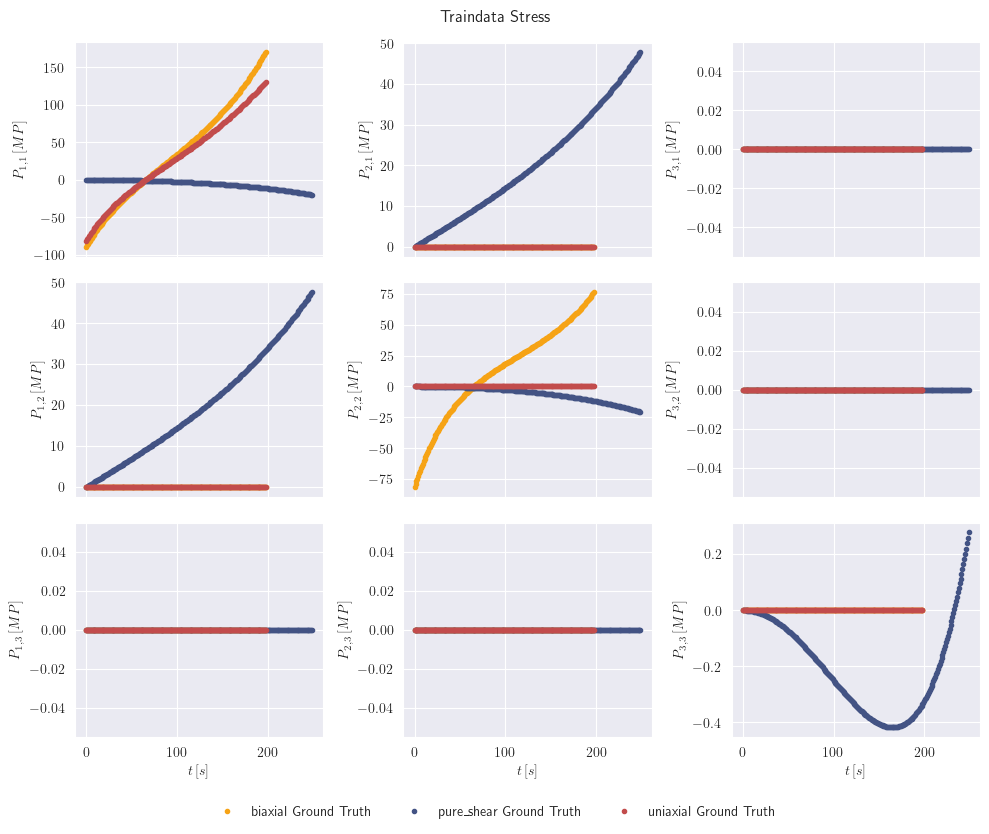

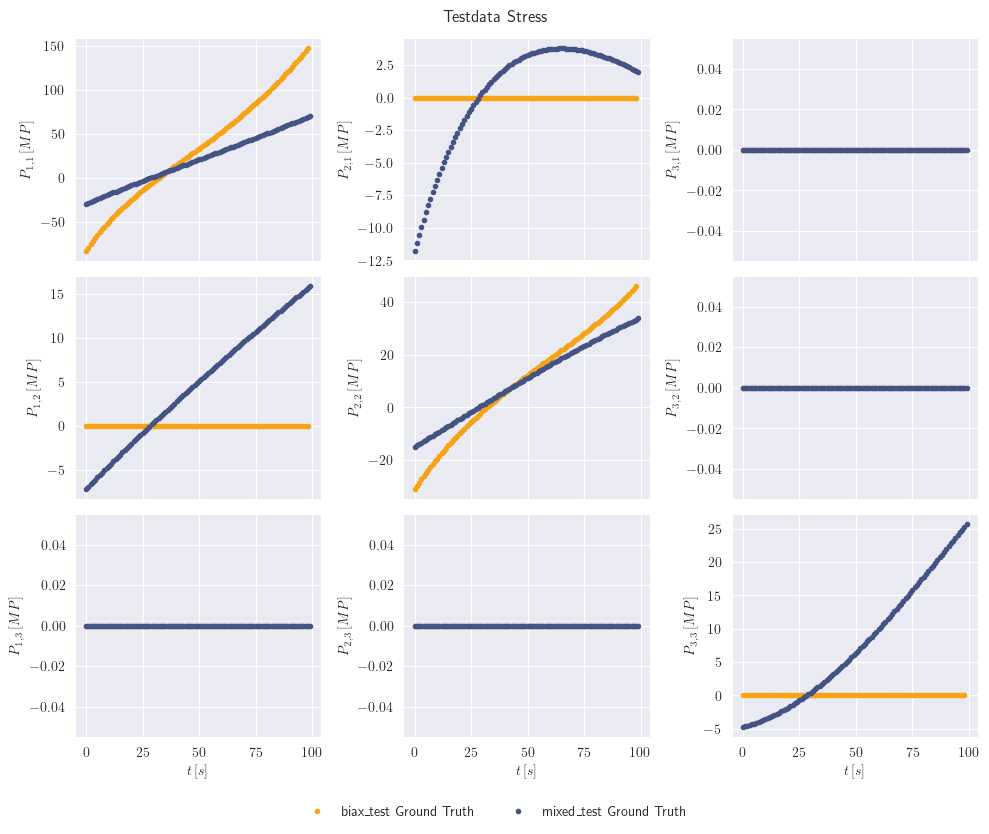

In [5]:
plot_stress_predictions({key: tup[1].numpy().reshape((-1, 9)) for key, tup in train_data.items()}, markevery_label=1, suptitle='Traindata Stress')
plot_stress_predictions({key: tup[1].numpy().reshape((-1, 9)) for key, tup in test_data.items()}, markevery_label=1, suptitle='Testdata Stress')

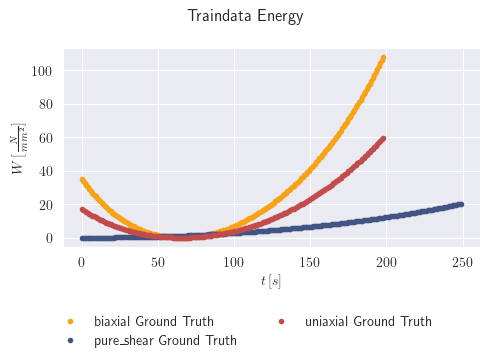

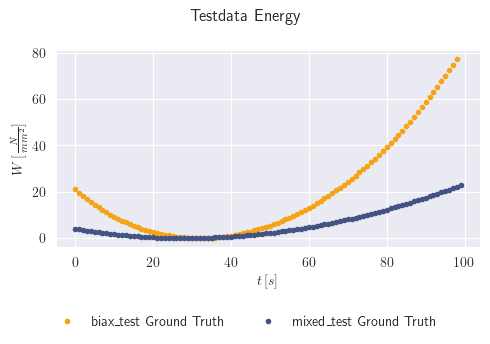

In [4]:
plot_energy_prediction({key: tup[2].numpy() for key, tup in train_data.items()}, markevery_label=1, suptitle='Traindata Energy')
plot_energy_prediction({key: tup[2].numpy() for key, tup in test_data.items()}, markevery_label=1, suptitle='Testdata Energy')